In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import csv
import h5py,glob
from math import *


# DJI RTK antenna measurements
Taken with the FSH4, in the lab

In [8]:
def VNAtranslator(allscans, rows_to_cut=51):
    freqs = []
    mags = []
    for i in range(len(allscans)):
        data = []
        with open(allscans[i], 'rt') as f:
            reader = csv.reader(f)
            for row in reader:
                data.append(row)
        data_np = np.array(data)
        datafinal = data_np[rows_to_cut:-1]
        df=[]
        freq1 = []
        mag1 = []
        for i in datafinal:
            freq1.append(float(i[0]))
            mag1.append(float(i[1]))   
        freqs.append(freq1)
        mags.append(mag1)
    return(freqs,mags)

def avg_spectra(spec_list):
    avg = np.zeros(len(spec_list[0]))
    for i in range(len(spec_list[0])):
        for j in range(len(spec_list)):
            avg[i] += (10.**(spec_list[j][i]/10.))
        avg[i] = avg[i]/len(spec_list)
        avg[i] = 10.*np.log10(avg[i])        
    return np.array(avg)

In [46]:
# Load in the data
fileset='./rtk_ant_spectra/*'
#fileset='/hirax/GBO_Oct_2021/RFIChamber/*.csv'

allscans=np.sort(glob.glob(fileset))

a_dfs = []; b_dfs = []; n_dfs = []

for i in range(len(allscans)):
    if ("_a_" in allscans[i]): a_dfs.append(pd.read_csv(allscans[i], header=47, names=["freq", "mag", "phase"], usecols=[0,1,2]))
    if ("_b_" in allscans[i]): b_dfs.append(pd.read_csv(allscans[i], header=47, names=["freq", "mag", "phase"], usecols=[0,1,2]))
    if ("_n_" in allscans[i]): n_dfs.append(pd.read_csv(allscans[i], header=47, names=["freq", "mag", "phase"], usecols=[0,1,2]))
        
for i in range(len(a_dfs)): a_dfs[i] = a_dfs[i].assign(freq = a_dfs[i].freq/1000000.)
for i in range(len(b_dfs)): b_dfs[i] = b_dfs[i].assign(freq = b_dfs[i].freq/1000000.)
for i in range(len(b_dfs)): n_dfs[i] = n_dfs[i].assign(freq = n_dfs[i].freq/1000000.)

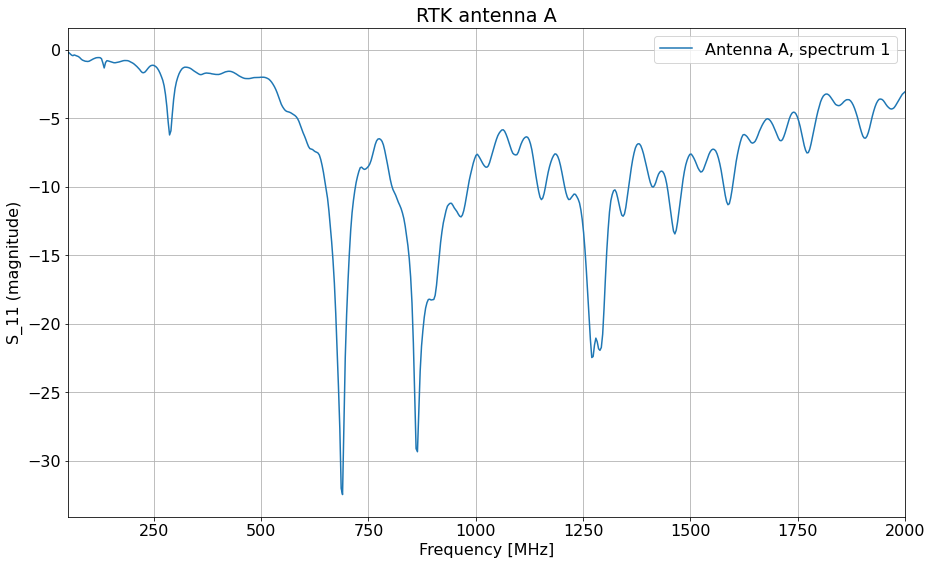

In [48]:
plt.figure(figsize=(15,9))
plt.plot(a_dfs[0].freq, a_dfs[0].mag, label="Antenna A, spectrum 1")
plt.xlim(50, 2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S_11 (magnitude)")
plt.grid()
plt.title("RTK antenna A")
plt.legend()
plt.show()


In [64]:
plt.figure(figsize=(15,9))
subset = a_dfs[2:-6]
for df in subset:
    plt.plot(df.freq, df.mag, color="tab:blue", alpha=0.5)
plt.xlim(50, 2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S_11 (magnitude)")
plt.grid()
plt.title("RTK antenna A ("+str(len(subset))+" traces stacked)")
#plt.legend()
plt.show()


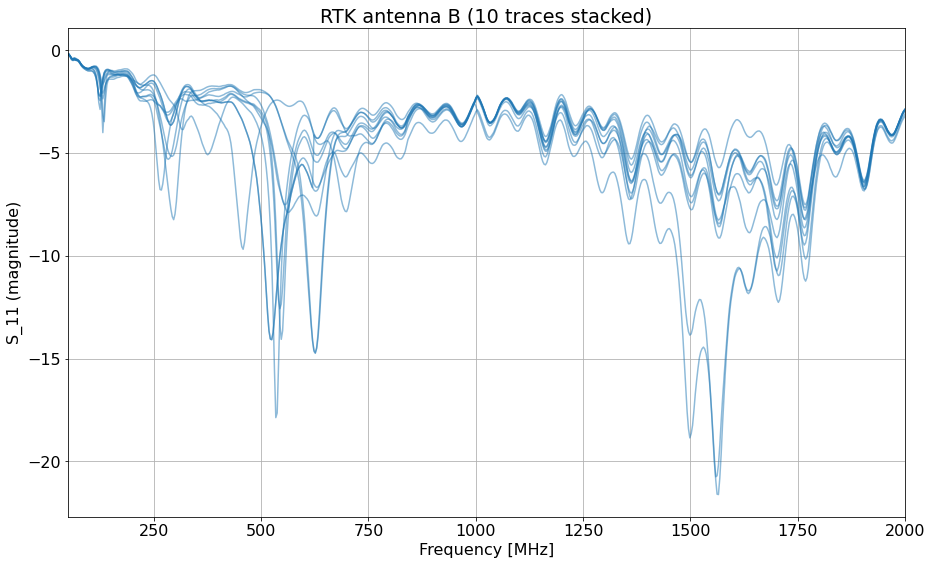

In [76]:
plt.figure(figsize=(15,9))
subset = b_dfs[5:15]
for df in subset:
    plt.plot(df.freq, df.mag, color="tab:blue", alpha=0.5)
plt.xlim(50, 2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S_11 (magnitude)")
plt.grid()
plt.title("RTK antenna B ("+str(len(subset))+" traces stacked)")
#plt.legend()
plt.show()


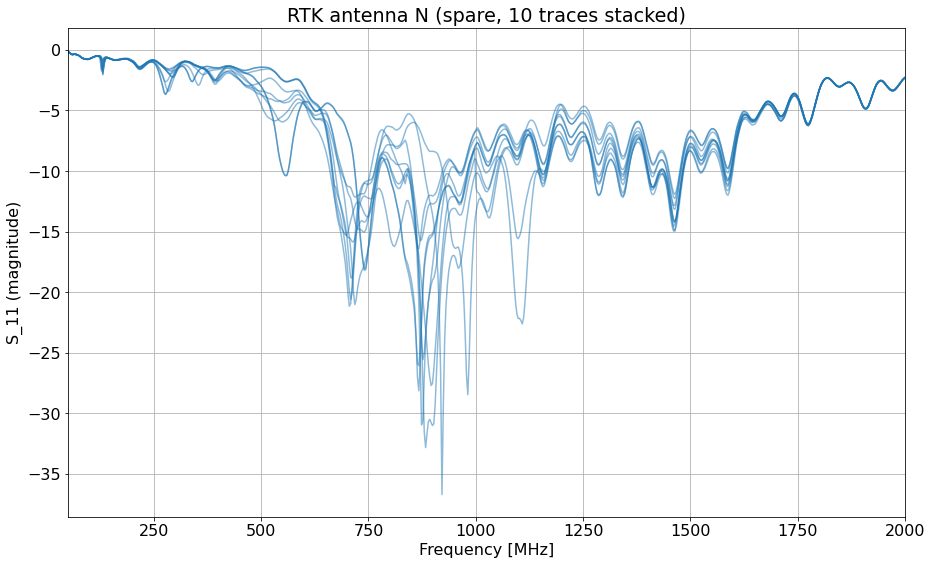

In [81]:
plt.figure(figsize=(15,9))
subset = n_dfs[0:10]
for df in subset:
    plt.plot(df.freq, df.mag, color="tab:blue", alpha=0.5)
plt.xlim(50, 2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S_11 (magnitude)")
plt.grid()
plt.title("RTK antenna N (spare, "+str(len(subset))+" traces stacked)")
#plt.legend()
plt.show()


In [95]:
a_mags = []; b_mags = []; n_mags = []
for df in a_dfs: a_mags.append(np.array(df.mag))
for df in b_dfs: b_mags.append(np.array(df.mag))
for df in n_dfs: n_mags.append(np.array(df.mag))

a_avg = avg_spectra(a_mags)
b_avg = avg_spectra(b_mags)
n_avg = avg_spectra(n_mags)

plt.figure(figsize=(15,9))
plt.plot(a_dfs[0].freq, a_avg, label="Antenna A")
plt.plot(b_dfs[0].freq, b_avg, label="Antenna B")
plt.plot(n_dfs[0].freq, n_avg, label="Antenna N (spare)")
plt.xlim(50, 2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S_11 [dB]")
plt.grid()
plt.title("RTK antennas (~10s of averaged traces while moving cables)")
plt.legend()
plt.show()
